In [2]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etape à adapter selon le chemin du fichier
# Chargement du fichier
allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_dataviz_final.xlsx")
allocine.head()

,ID,titre,titre_original,acteurs,acteur_1,acteur_2,acteur_3,acteur_4,realisateur,real_1,...,date2,annee,jour_split,mois_split,annee_split,actors_score,directors_score,scenaristes_score,distrib_score,budget_dollars
0,270572,Petta,PETTA,"Rajinikanth, Vijay Sethupathi, Nawazuddin Sidd...",Rajinikanth,Vijay Sethupathi,Nawazuddin Siddiqui,Bobby Simha,Karthik Subbaraj,Karthik Subbaraj,...,2019-01-10,2019.0,10.0,1.0,2019.0,0.455621,1.125524,0.141740,0.01495,1.0
1,293378,Les SEGPA,LES SEGPA,"Ichem Bougheraba, Walid Ben Amar, Arriles Amra...",Ichem Bougheraba,Walid Ben Amar,Arriles Amrani,Kader Bueno,"Ali Bougheraba, Hakim Bougheraba",Ali Bougheraba,...,2022-04-20,2022.0,20.0,4.0,2022.0,0.135466,1.055201,0.000000,0.01473,1.0
2,246253,L'Amant D'un Jour,L'AMANT D'UN JOUR,"Eric Caravaca, Esther Garrel, Louise Chevillot...",Eric Caravaca,Esther Garrel,Louise Chevillotte,Felix Kysyl,Philippe Garrel,Philippe Garrel,...,2017-05-31,2017.0,31.0,5.0,2017.0,0.559548,1.983822,0.978035,0.00998,2.0
3,280918,L'Homme parfait,L'HOMME PARFAIT,"Didier Bourdon, Pierre-Francois Martin-Laval, ...",Didier Bourdon,Pierre-Francois Martin-Laval,Valerie Karsenti,Philippe Duquesne,Xavier Durringer,Xavier Durringer,...,2022-06-22,2022.0,22.0,6.0,2022.0,0.632422,1.379569,0.437381,0.01664,4.0
4,310521,Testament,TESTAMENT,"Remy Girard, Sophie Lorain, Marie-Mai, Guylain...",Remy Girard,Sophie Lorain,Marie-Mai,Guylaine Tremblay,Denys Arcand,Denys Arcand,...,2023-11-22,2023.0,22.0,11.0,2023.0,0.459392,1.840676,0.905899,0.02466,6.0


In [3]:
# Vérification du nombre de valeurs manquantes
allocine.isna().sum()

ID                            0
titre                         0
titre_original                0
acteurs                     372
acteur_1                    372
acteur_2                    439
acteur_3                    492
acteur_4                    556
realisateur                   0
real_1                        0
real_2                     5815
genres                        0
genre_1                       0
genre_2                    3110
genre_3                    5237
scenariste                  137
scen_1                      137
scen_2                     2033
scen_3                     3970
duree                         0
note_presse                   0
note_spectateurs            175
pays                          0
distributeur                 25
distrib_1                    25
premiere_semaine_france       0
cumul_france                  0
premiere_semaine_US        4623
cumul_US                   4623
date2                         0
annee                         0
jour_spl

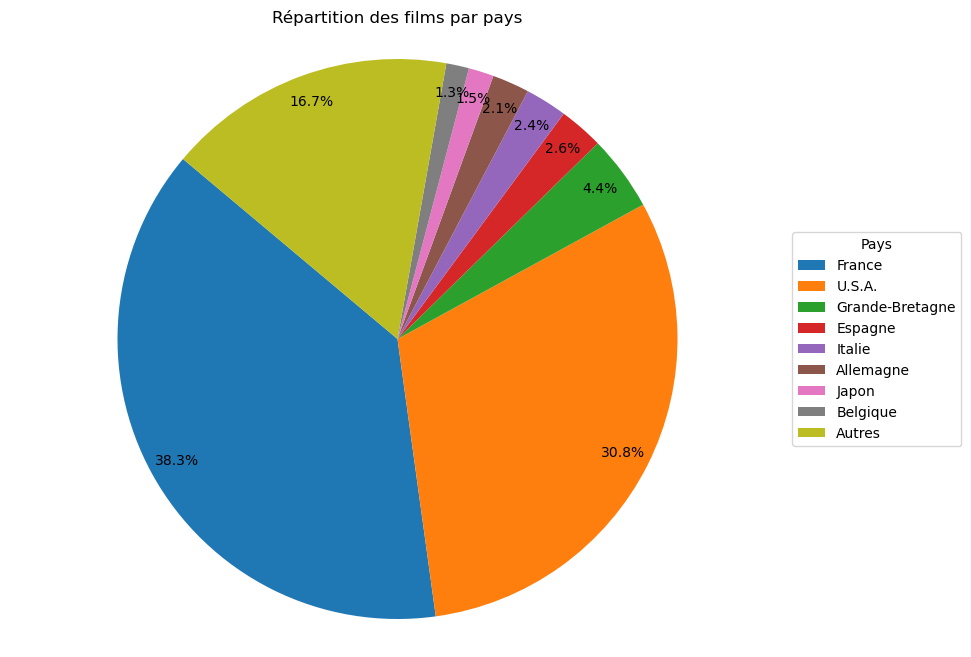

In [4]:
# Calcul du nombre de films par pays

import matplotlib.pyplot as plt

pays_counts = allocine['pays'].value_counts()

# Conserver seulement les dix premiers pays et ajouter les autres à une catégorie 'Autres'
top_pays = pays_counts[:8]  # Prendre les dix premiers pays
autres = pays_counts[8:].sum()  # Somme des autres pays
top_pays['Autres'] = autres  # Ajouter les autres pays comme une nouvelle catégorie

# Créer un diagramme circulaire
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(top_pays, autopct='%1.1f%%', startangle=140, pctdistance=0.9)

# Ajouter une légende
plt.legend(wedges, top_pays.index, title="Pays", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Définir le titre
plt.title('Répartition des films par pays')

# Assurer que le pie chart est dessiné comme un cercle
plt.axis('equal')

# Afficher le graphique
plt.show()

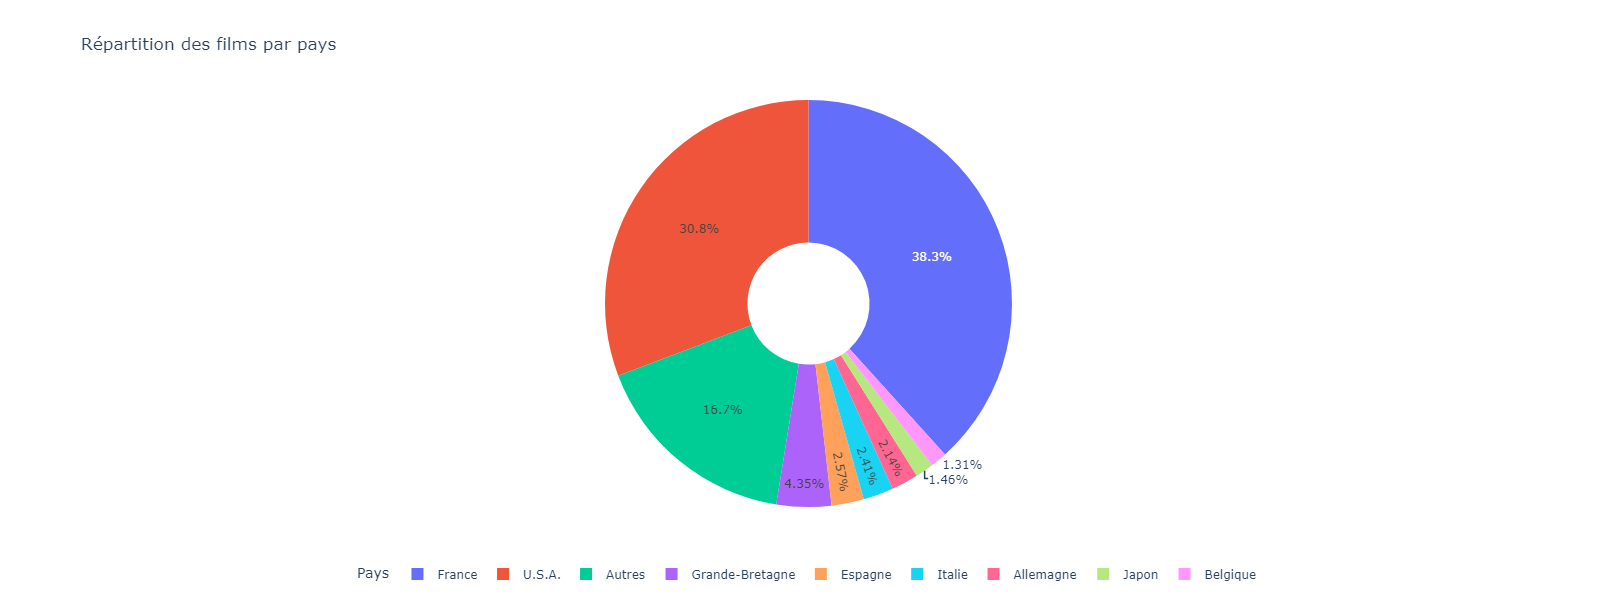

In [9]:
# Calcul du nombre de films par pays avec plotly

import plotly.express as px
pays_counts = allocine['pays'].value_counts()

# Conserver seulement les dix premiers pays et ajouter les autres à une catégorie 'Autres'
top_pays = pays_counts[:8]  # Prendre les dix premiers pays
autres = pays_counts[8:].sum()  # Somme des autres pays
top_pays['Autres'] = autres  # Ajouter les autres pays comme une nouvelle catégorie

# Créer un diagramme circulaire
fig = px.pie(values=top_pays, names=top_pays.index, title='Répartition des films par pays',
             hole=0.3)  # Ajout d'un 'donut hole' pour un style différent

# Personnaliser la légende et ajuster la taille du graphique
fig.update_layout(
    legend_title="Pays",
    legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="center", x=0.5),
    width=1000,
    height=600
)

# Afficher le graphique
fig.show()

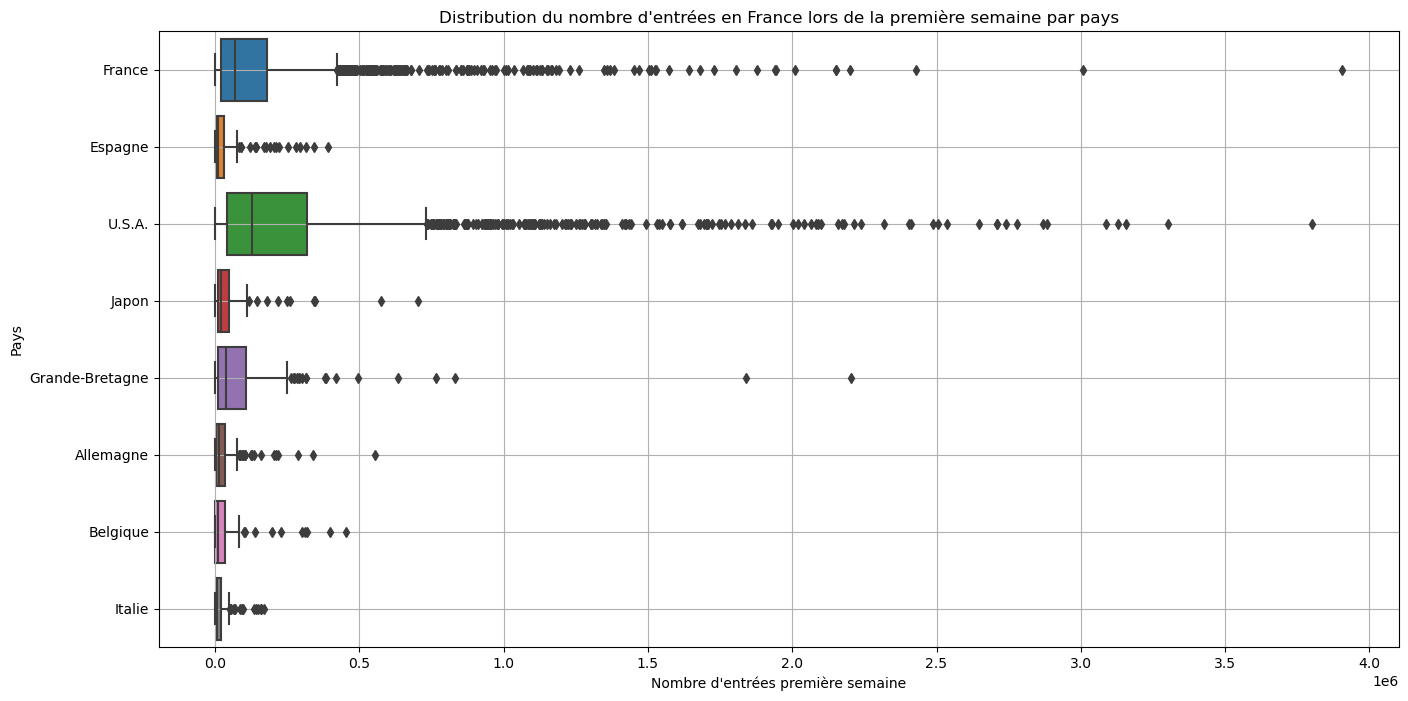

In [8]:
# Lien entre le pays et le box-office en première semaine

import matplotlib.pyplot as plt
import seaborn as sns

# Préparer les données: filtrer les pays avec un nombre significatif de films pour une comparaison valide
top_pays = allocine['pays'].value_counts().nlargest(8).index
data_filtered = allocine[allocine['pays'].isin(top_pays)]

# Créer un boxplot horizontal
plt.figure(figsize=(16, 8))
sns.boxplot(y='pays', x='premiere_semaine_france', data=data_filtered, orient='h')  # Utilisez orient='h' pour un boxplot horizontal

plt.title('Distribution du nombre d\'entrées en France lors de la première semaine par pays')
plt.ylabel('Pays')
plt.xlabel('Nombre d\'entrées première semaine')
plt.yticks(rotation=0)  # Pas besoin de rotation pour l'axe des y
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité des valeurs

# Afficher le graphique
plt.show()

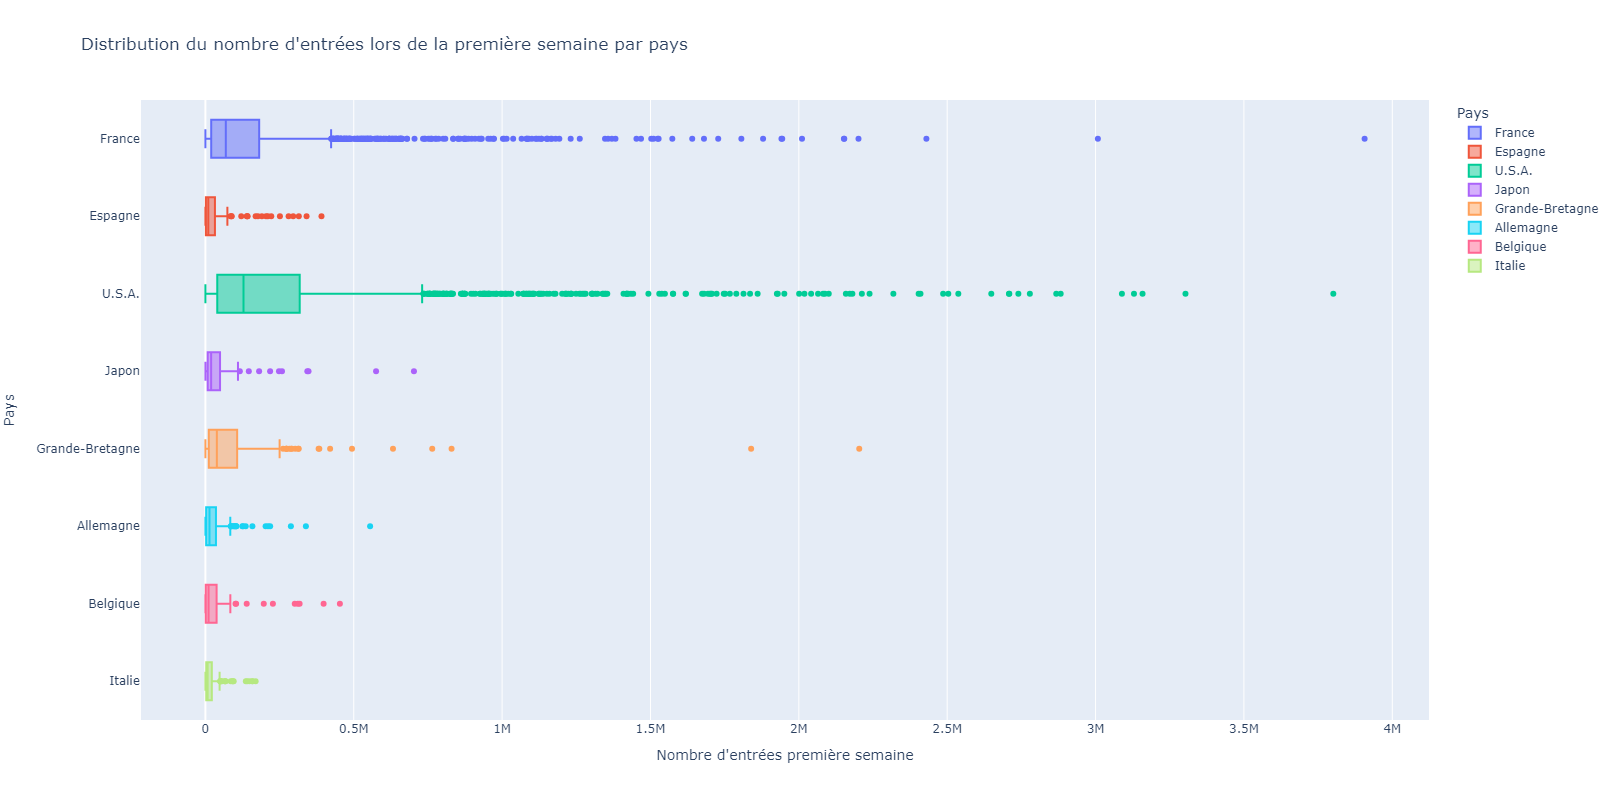

In [10]:
# Lien entre le pays et le box-office en première semaine avec plotly

import plotly.express as px

# Préparer les données: filtrer les pays avec un nombre significatif de films pour une comparaison valide
top_pays = allocine['pays'].value_counts().nlargest(8).index
data_filtered = allocine[allocine['pays'].isin(top_pays)]

# Créer un boxplot horizontal avec une couleur par pays
fig = px.box(data_filtered, y='pays', x='premiere_semaine_france', color='pays',
             orientation='h', 
             labels={'premiere_semaine_france': 'Nombre d\'entrées première semaine', 'pays': 'Pays'},
             title='Distribution du nombre d\'entrées lors de la première semaine par pays')

# Personnaliser la présentation
fig.update_layout(
    xaxis_title='Nombre d\'entrées première semaine',
    yaxis_title='Pays',
    height=800,
    legend_title='Pays'
)

# Afficher le graphique
fig.show()